# HW05: Classification (due 2nd November)

**As part of NEXT WEEK'S homework (HW06) you will have to provide feedback to two of your classmates' essays on Eduflow.** On Eduflow, you will be automatically assigned to the two essays you have to provide feedback to on Friday, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.

**Answer**

Goal: We want to have a full dataset of income of all the municipalities. That is, we want to predict the income for the municipalities with missing income.

We assume the demographic and employment data to be complete. We can use the municipalities with income data to train a machine learning model to predict the income for the municipalities where the value is missing.

As the outcome variable (income) is continuous, we are looking for a regression method. Our choices are OLS or Ridge/Lasso/Elastic Net regression. The choice of method also depends on what data we have at our disposal:

- Few determinants: If we don't have many different variables we can manually select important features through simple reasoning and perform a standard OLS regression using the given variables.
- Many determinants: If we have a lot of variables we might be better off with a data-driven approach such as Ridge, Lasso or Elastic Net regression. Lasso would be most suitable if we want to perform automated feature selection, as it pushes the coefficients of less important features to 0.

I the following, I will assume a moderately large set of variables, where we can pick out important determinants by hand. Thus a standard OLS regression would be sufficient.

Some variables to include might be sector, occupation, management position, tenure, age, education, gender, municipality, neighborhood, marital status, children etc.

Depending on how much complete data we have at our disposal, we can split up the fraction including income information into a training and test set, train our model on the training set and assess its performance using the test set.

If we only have very few observations including income we can choose to use it all for training, but this will then give us biased estimates for MSE, R2 and other statistics.

With the OLS model we can then predict the missing incomes, and distribute financial aid based on this.

I see possibilities for the use of other models to predict the "effectiveness" of financial aid if the state only has limited resources at its disposal (which is probably the case). This would require a metric to measure effectiveness of financial aid (e.g. increase in income) and also training data (the control group).

## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/HW05.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Visualize the data

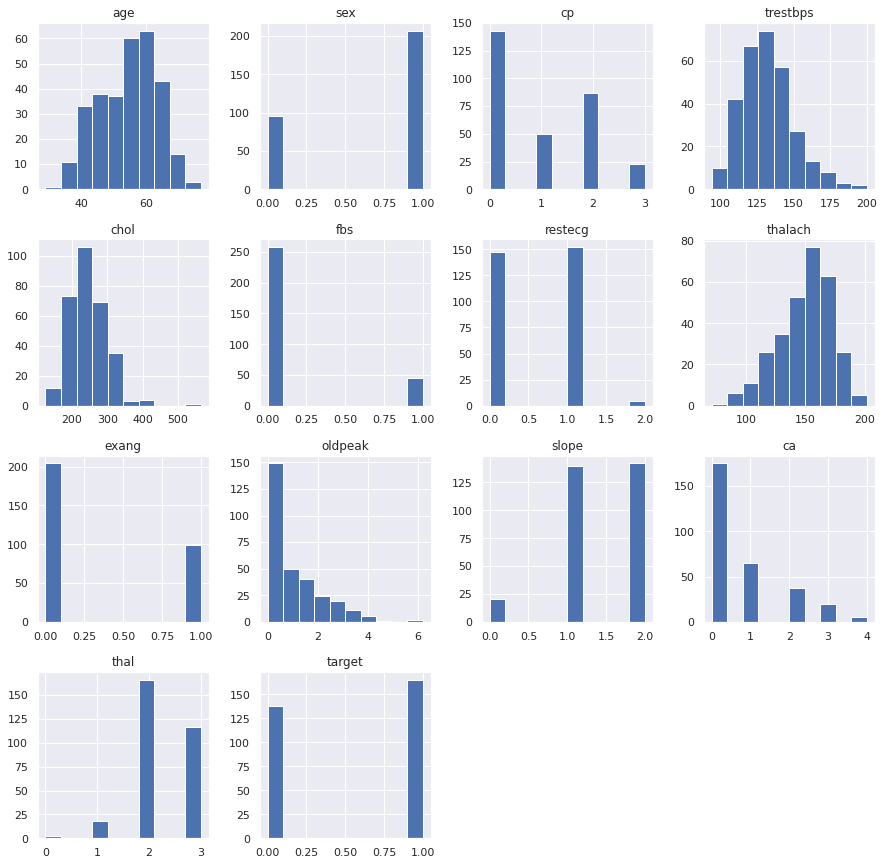

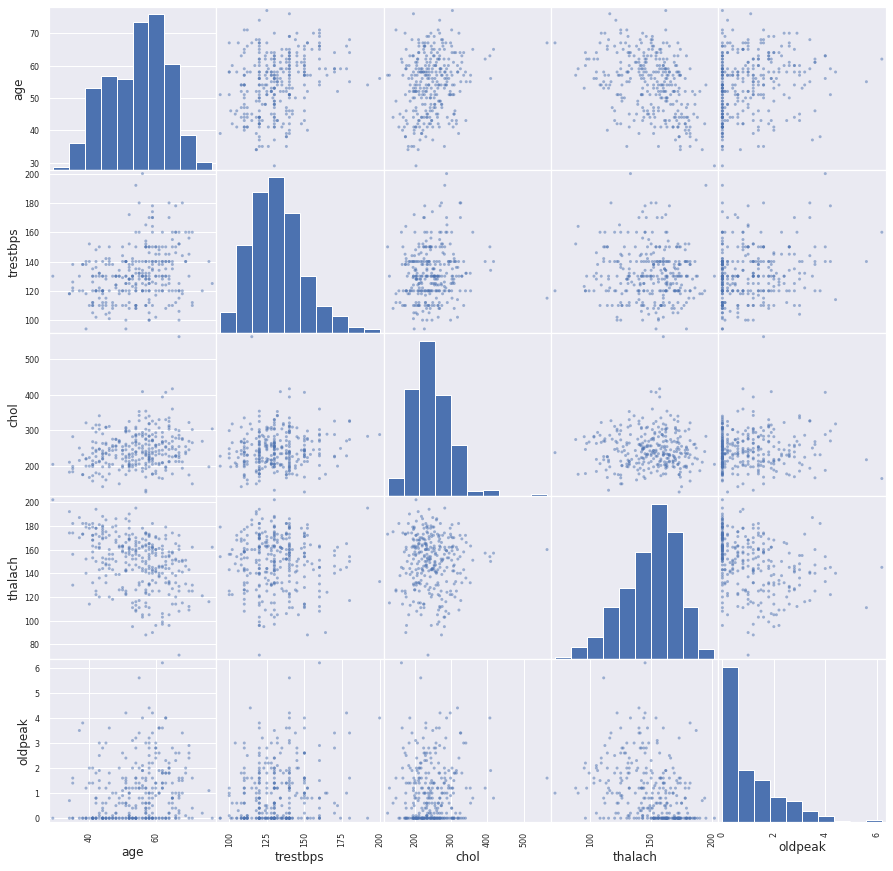

In [4]:
##TODO plot the         # Very mysterious ;)

from pandas.plotting import scatter_matrix

sns.set_theme()

df.hist(figsize=(15, 15))

scatter_matrix(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], figsize=(15, 15));

# Data seems clean: No cutoffs, no strong correlation between covariates

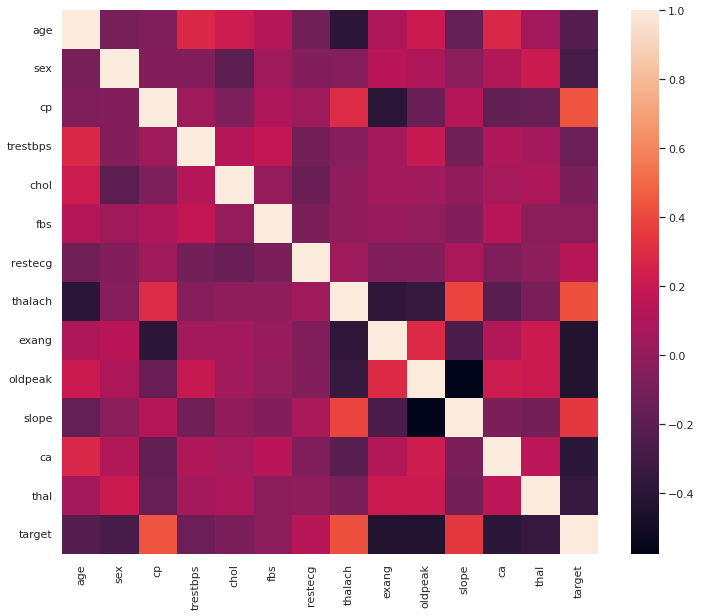

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())
plt.show()

### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score

# TODO split the sample into a training, a test set and a validation set

X = df.drop(columns='target')
y = df['target']

# We'll do a 60-20-20 split
X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_val_train, y_val_train, test_size=0.2)

# TODO train a classifier using early stopping and the logloss evaluation metric

xgb_class = XGBClassifier()

xgb_class.fit(
    X_train,
    y_train,
    early_stopping_rounds=10,
    eval_metric='logloss',
    eval_set=[(X_val, y_val)]
)

y_pred = xgb_class.predict(X_test)


[0]	validation_0-logloss:0.60088
[1]	validation_0-logloss:0.52871
[2]	validation_0-logloss:0.46943
[3]	validation_0-logloss:0.44341
[4]	validation_0-logloss:0.43103
[5]	validation_0-logloss:0.43732
[6]	validation_0-logloss:0.41851
[7]	validation_0-logloss:0.42320
[8]	validation_0-logloss:0.42074
[9]	validation_0-logloss:0.40536
[10]	validation_0-logloss:0.39337
[11]	validation_0-logloss:0.40688


/home/federico/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12]	validation_0-logloss:0.41129
[13]	validation_0-logloss:0.41664
[14]	validation_0-logloss:0.40644
[15]	validation_0-logloss:0.41651
[16]	validation_0-logloss:0.40829
[17]	validation_0-logloss:0.40856
[18]	validation_0-logloss:0.41059
[19]	validation_0-logloss:0.41473


Accuracy:          0.8524590163934426
Balanced accuracy: 0.8383333333333334


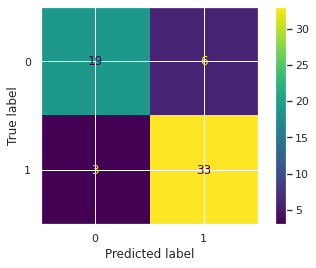

In [28]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

##TODO plot the confusion metrics and calculate the accuracy score

plot_confusion_matrix(xgb_class, X_test, y_test)

acc = accuracy_score(y_test, y_pred)
acc_bal = balanced_accuracy_score(y_test, y_pred)
print("Accuracy:         ", acc);
print("Balanced accuracy:", acc_bal)

**What can you say about the performance of your classifier based on these metrics?**

The two classes are quite balanced, so the accuracy score and balanced accuracy score are similar. Both are around 85%, which is decent for the task. We have a few false positives and even fewer false negatives. The sample size is relatively small, so increasing the number might increase these metrics.

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.**

Generally, I see the main goal of the classification task to save as many lives as possible. This means we want to minimize the number of false negatives. We don't care too much if we allocate resources to a patient that is less likely to have a heart attack. Thus, a good metric would be recall (TP/(TP+FN), we want to classify as many of the actual positives as positives)

If instead we decide that it's more important that doctors use their time in the most efficient way possible and a few patients dying of heart attack is OK... Well, first of all, are we sure about that? In this case F1 score could provide a metric for a good balance of saving lives and allocating medial resources in the most effective way possible.

precision:     0.8461538461538461
recall:        0.9166666666666666
F1 score:      0.8799999999999999
ROC AUC score: 0.8383333333333333


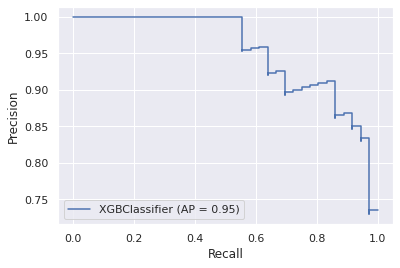

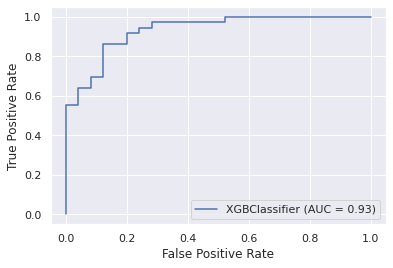

In [34]:
from sklearn.metrics import (precision_score, recall_score, f1_score, plot_precision_recall_curve,
                             balanced_accuracy_score, plot_roc_curve, auc, roc_auc_score)

# Balanced accuracy score used before already, although not necessary

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("precision:    ", prec)
print("recall:       ", rec)
print("F1 score:     ", f1)
print("ROC AUC score:", auc_score)

plot_precision_recall_curve(xgb_class, X_test, y_test)

plot_roc_curve(xgb_class, X_test, y_test)


**Analysis:**

We have a relatively high recall (91%), higher than precision, which is exactly what we were looking for. This sounds like it is comparable to human decisions, so we could save doctors some time by using this method to assess patients.

I'm unsure about what there is to learn from precision-recall curves and ROC curve.

**OPTIONAL QUESTION: Suppose that the classifier you built performs very well, would you suggest using it to decide on the allocation of treatments to preent heart attacks?**